## Laboratorio 1

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Problema 1

In [44]:
img_original = cv2.imread("quetzal.jpg")
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

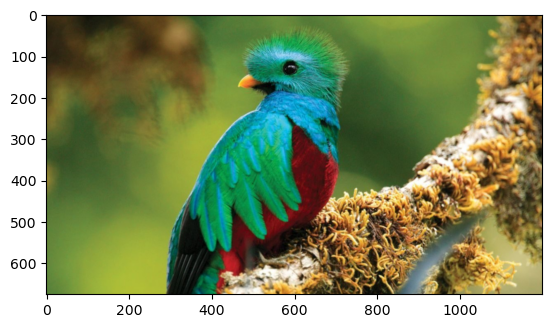

In [45]:
plt.imshow(img_original)

#### Definimos la función

In [46]:
def imagen_canal_color(img, color):
     alto = img.shape[0]
     ancho = img.shape[1]
     
     img_salida = np.zeros_like(img)
     
     for i in range(0, alto):
          for j in range(0, ancho):
               pixel = img[i, j]
               red = pixel[0]
               green = pixel[1]
               blue = pixel[2]
               
               if color == 1:
                    img_salida[i, j] = [0, 0, blue]
               elif color == 2:
                    img_salida[i, j] = [0, green, 0]
               elif color == 3:
                    img_salida[i, j] = [red, 0, 0]
               elif color == 10:
                    img_salida[i, j] = [red, green, 0]
               elif color == 20:
                    img_salida[i, j] = [0, green, blue]
               elif color == 30:
                    img_salida[i, j] = [red, 0, blue]
               else:
                    img_salida = img
     
     return img_salida

#### Canal azul - 1

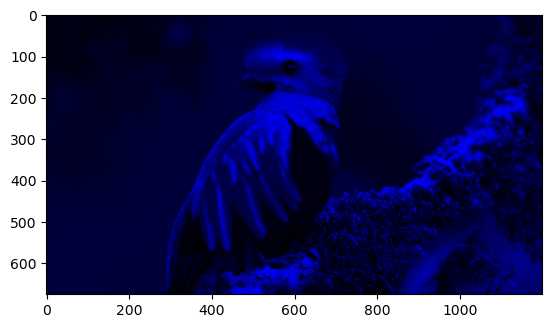

In [47]:
img_result = imagen_canal_color(img_original, 1)
plt.imshow(img_result)

#### Canal verde - 2

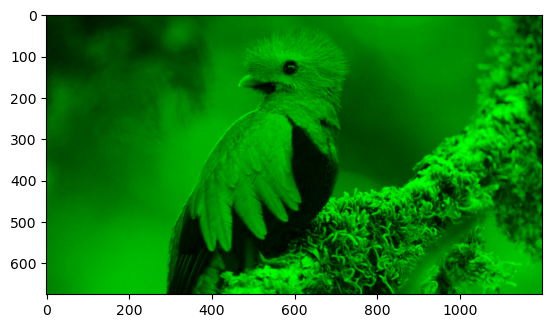

In [48]:
img_result = imagen_canal_color(img_original, 2)
plt.imshow(img_result)

#### Canal rojo - 3

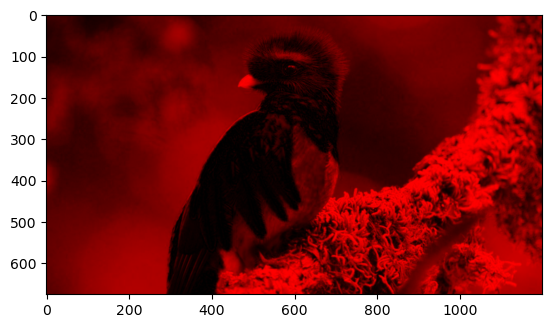

In [49]:
img_result = imagen_canal_color(img_original, 3)
plt.imshow(img_result)

#### Canal rojo y verde - 10

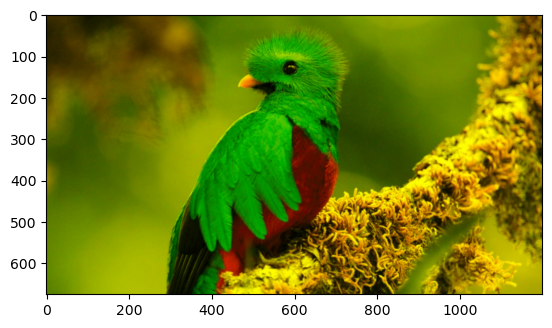

In [50]:
img_result = imagen_canal_color(img_original, 10)
plt.imshow(img_result)

#### Canal verde y azul - 20

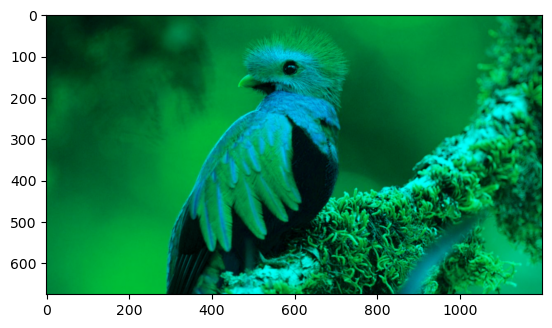

In [51]:
img_result = imagen_canal_color(img_original, 20)
plt.imshow(img_result)

#### Canal azul y rojo - 30

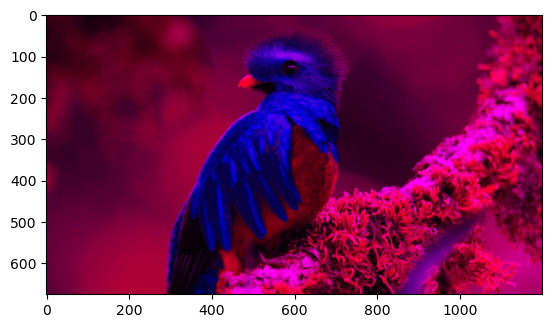

In [52]:
img_result = imagen_canal_color(img_original, 30)
plt.imshow(img_result)

### Problema 2

In [53]:
def generar_imagen_color(img_gray_red, img_gray_green, img_gray_blue):

    img_color = cv2.merge((img_gray_red, img_gray_green, img_gray_blue))

    return img_color

In [54]:
# cv2.IMREAD_GRAYSCALE es clave para que todas las imagenes tengan la misma dimensión.
img_gray_rojo = cv2.imread("imagen1/imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE) 
img_gray_verde = cv2.imread("imagen1/imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_gray_azul = cv2.imread("imagen1/imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

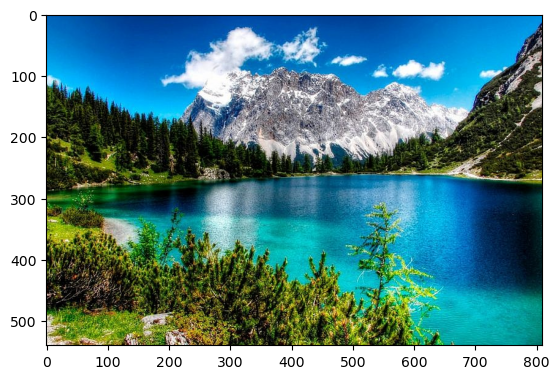

In [55]:
img_color_result = generar_imagen_color(img_gray_rojo, img_gray_verde, img_gray_azul)
plt.imshow(img_color_result)

In [56]:
img_gray_rojo = cv2.imread("imagen2/imagen2_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE) 
img_gray_verde = cv2.imread("imagen2/imagen2_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_gray_azul = cv2.imread("imagen2/imagen2_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

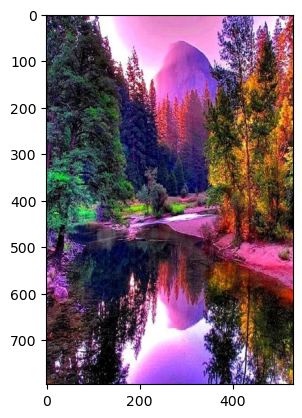

In [57]:
img_color_result = generar_imagen_color(img_gray_rojo, img_gray_verde, img_gray_azul)
plt.imshow(img_color_result)

In [58]:
img_gray_rojo = cv2.imread("perro/perro_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE) 
img_gray_verde = cv2.imread("perro/perro_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_gray_azul = cv2.imread("perro/perro_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

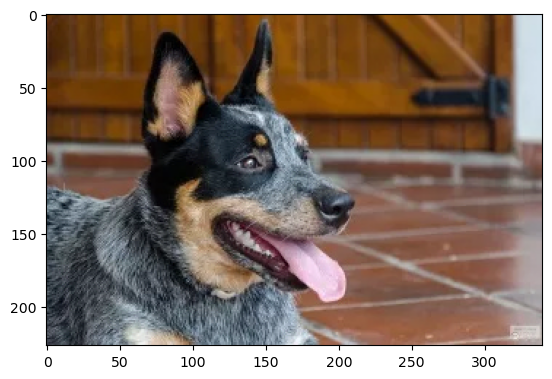

In [59]:
img_color_result = generar_imagen_color(img_gray_rojo, img_gray_verde, img_gray_azul)
plt.imshow(img_color_result)

### Problema 3

In [60]:
def generar_imagen_escala_grises(img_color):

    img_gray_red, img_gray_green, img_gray_blue = cv2.split(img_color)

    cv2.imwrite('quetzal/quetzal_gris_rojo.jpg', img_gray_red)
    cv2.imwrite('quetzal/quetzal_gris_verde.jpg', img_gray_green)
    cv2.imwrite('quetzal/quetzal_gris_azul.jpg', img_gray_blue)

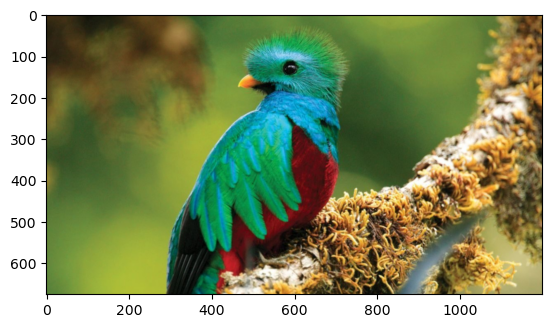

In [61]:
img_original_color = cv2.imread('quetzal/quetzal.jpg')
img_original_color = cv2.cvtColor(img_original_color, cv2.COLOR_BGR2RGB)
plt.imshow(img_original_color)

In [62]:
generar_imagen_escala_grises(img_original_color)

#### Imagen gris rojo

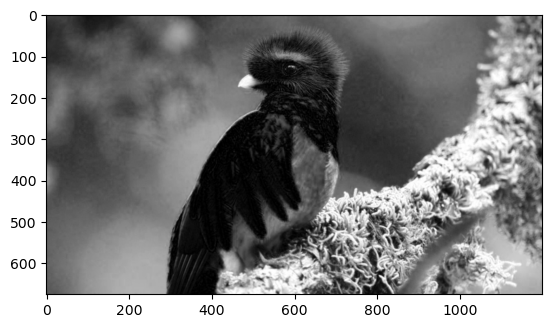

In [63]:
img_gray_red = cv2.imread('quetzal/quetzal_gris_rojo.jpg')
plt.imshow(img_gray_red)

#### Imagen gris verde

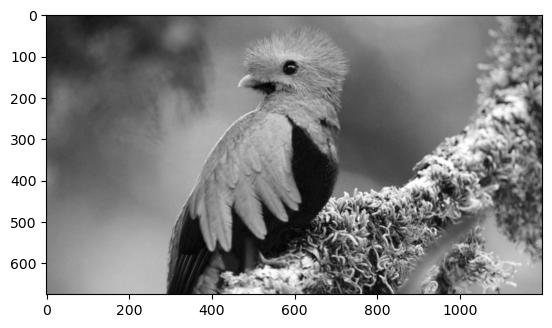

In [64]:
img_gray_verde = cv2.imread('quetzal/quetzal_gris_verde.jpg')
plt.imshow(img_gray_verde)

#### Imagen gris azul

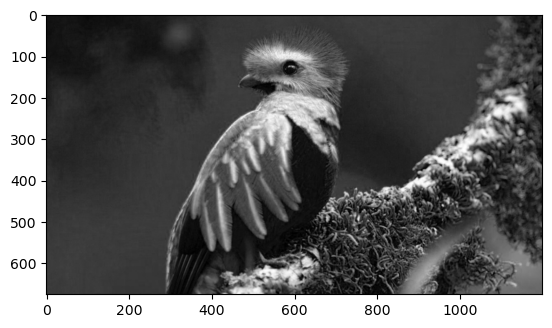

In [65]:
img_gray_azul = cv2.imread('quetzal/quetzal_gris_azul.jpg')
plt.imshow(img_gray_azul)

### Problema 4

In [66]:
def histogramas_imagen(img_color):

    red = img_color[:, :, 0]
    green = img_color[:, :, 1]
    blue = img_color[:, :, 2]
    
    img_gray = (red.astype(np.float32) + green.astype(np.float32) + blue.astype(np.float32)) / 3
    img_gray = img_gray.astype(np.uint8)
    
    hist_red = np.histogram(red, bins=256, range=(0, 256))[0]
    hist_green = np.histogram(green, bins=256, range=(0, 256))[0]
    hist_blue = np.histogram(blue, bins=256, range=(0, 256))[0]
    hist_gray = np.histogram(img_gray, bins=256, range=(0, 256))[0]
    
    mean_red = np.mean(red)
    mean_green = np.mean(green)
    mean_blue = np.mean(blue)
    mean_gray = np.mean(img_gray)


    resultados = {
        'hist_red': hist_red,
        'mean_red': mean_red,
        'hist_green': hist_green,
        'mean_green': mean_green,
        'hist_blue': hist_blue,
        'mean_blue': mean_blue,
        'hist_gray': hist_gray,
        'mean_gray': mean_gray
    }

    return resultados


In [67]:
img_original_color = cv2.imread('quetzal.jpg')
img_original_color = cv2.cvtColor(img_original_color, cv2.COLOR_BGR2RGB)

In [68]:
result_hist_imagen = histogramas_imagen(img_original)

Text(0, 0.5, 'Frecuencia')

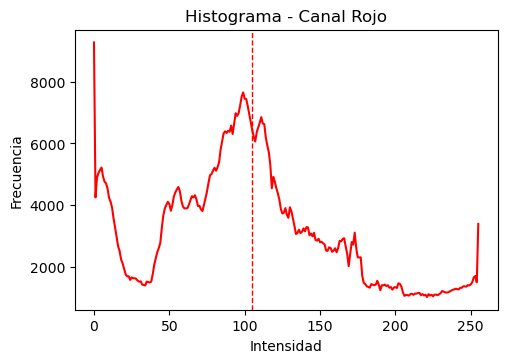

In [69]:
plt.figure(figsize=(12, 8))
    
plt.subplot(2, 2, 1)
plt.plot(result_hist_imagen['hist_red'], color='red')
plt.axvline(result_hist_imagen['mean_red'], color='red', linestyle='dashed', linewidth=1)
plt.title('Histograma - Canal Rojo')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

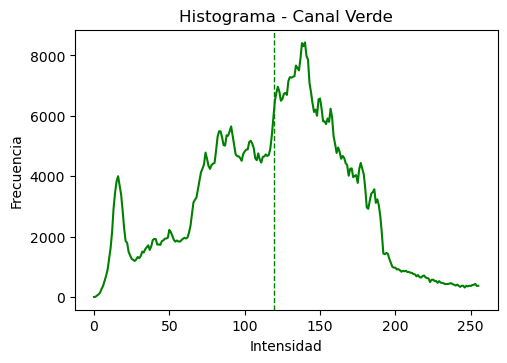

In [70]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
plt.plot(result_hist_imagen['hist_green'], color='green')
plt.axvline(result_hist_imagen['mean_green'], color='green', linestyle='dashed', linewidth=1)
plt.title('Histograma - Canal Verde')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

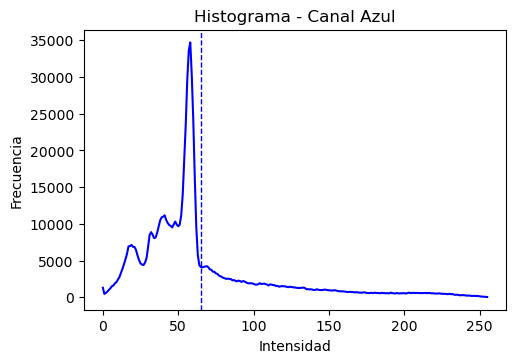

In [71]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 3)
plt.plot(result_hist_imagen['hist_blue'], color='blue')
plt.axvline(result_hist_imagen['mean_blue'], color='blue', linestyle='dashed', linewidth=1)
plt.title('Histograma - Canal Azul')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

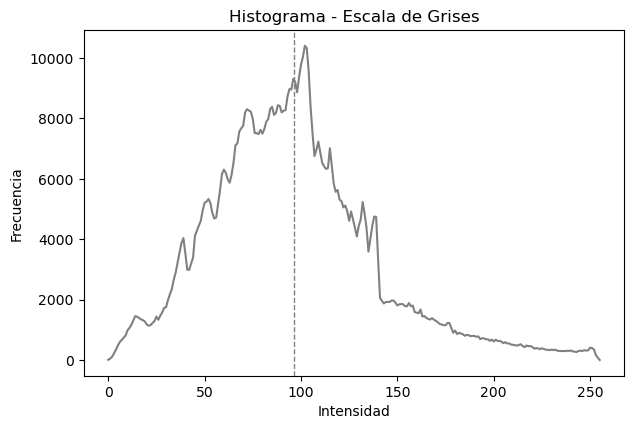

In [72]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 4)
plt.plot(result_hist_imagen['hist_gray'], color='gray')
plt.axvline(result_hist_imagen['mean_gray'], color='gray', linestyle='dashed', linewidth=1)
plt.title('Histograma - Escala de Grises')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
    
plt.tight_layout()
plt.show()

### Problema 5

Técnica que le asigna un valor especifico a cada canal de color basándose en la sensibilidad de los humanos para percibir la luz roja, verde y azul. El ojo humano percibe más la luz verde, seguida de la luz roja y por último la luz azul, es por eso que al verde se le asigna un peso de 0.59, al rojo 0.3 y al azul 0.11.

In [73]:
def generar_imagen_gris_ponderado(img_color):
    
    img_gray = np.zeros_like(img_color)
    
    red = img_color[:, :, 0]
    green = img_color[:, :, 1]
    blue = img_color[:, :, 2]

    img_gray = 0.3 * red + 0.59 * green + 0.11 * blue
    img_gray = img_gray.astype(np.uint8)

    return img_gray

In [74]:
img_original_color = cv2.imread('quetzal.jpg')
img_original_color = cv2.cvtColor(img_original_color, cv2.COLOR_BGR2RGB)

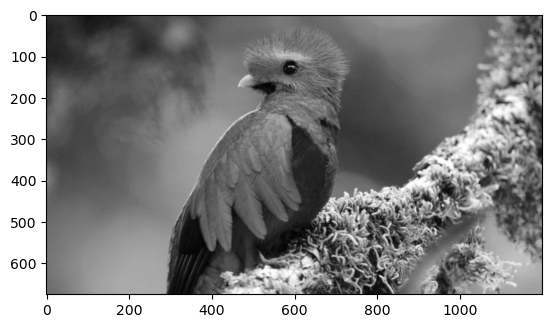

In [75]:
img_gris_ponderado = generar_imagen_gris_ponderado(img_original_color)
plt.imshow(img_gris_ponderado, cmap="gray")

### Problema 6

HSV es un modelo de color que representa colores de una manera que se alinea más con la percepción humana en comparación con el modelo RGB (Rojo, Verde, Azul). Las siglas HSV significan:

1. Hue (Tono): Indica el tipo de color y se mide en grados en un círculo de color, abarcando un rango de 0 a 360 grados. Por ejemplo, 0 grados corresponde al rojo, 120 grados al verde, y 240 grados al azul.
2. Saturation (Saturación): Describe la intensidad o pureza del color, representando la cantidad de gris presente en el color. La saturación varía de 0% (gris) a 100% (color puro). Un color con saturación al 100% es completamente puro, mientras que un color con saturación al 0% es un tono de gris.
3. Value (Valor) o Brightness (Brillo): Refleja el brillo del color, medido en una escala del 0% (negro) al 100% (máximo brillo del color). El valor determina que tan claro u oscuro es el color.